# Exercises  "Lecture 10: Clustering"

In this set of exercises, we will use clustering to group the wikipedia articles into 16 clusters. Since we are working on clustering (unsupervised machine learning),  we will ignore the labels (the category of the article) when training. We will use them however to evaluate the trained model (intrinsic evaluation).


The exercises cover the following points:

* Storing the data into an pandas dataframe and inspecting the data
* Learning a clustering model from the data 
* Inspecting the output clusters

Data: wkp_sorted.zip      

Python libraries
- sklearn.datasets to load data 
- pandas
- numpy unique method to remove duplicate   

Cheat sheets
- clustering_cheat_sheet.ipynb


##  Loading the Data into a Dataframe

**Exercise 1** 

* Create a pandas dataframe containing two columns one for the text and one for the category of each Wikipedia article included in  "data/wkp_sorted/". 
* Use sklearn.datasets load_files method (cf. clustering CS) 

In [92]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score
from sklearn.cluster import KMeans
import nltk

In [2]:
os.chdir('/experiments/cours nlp/data science/lecture10/wkp_sorted')

In [3]:
data_folder = os.listdir()
wiki_data = []
for d in data_folder:
    path = os.listdir(os.path.join(os.getcwd(), d))
    for text_data in path:
        with open(os.path.join(os.getcwd(),d,text_data),"r",encoding="utf-8") as f:
            data = f.readlines()
            wiki_data.append([[d], data])

In [4]:
#wiki_data

In [5]:
df = pd.DataFrame(wiki_data, columns=['category','content'])
df['category'] = df['category'].apply(lambda x : ''.join(x))
df['content'] = df['content'].apply(lambda x : ''.join(x))

In [6]:
df.head()

,category,content
0,Airports,Airports of Serbia (Serbian Cyrillic: Аеродром...
1,Airports,An airport authority is an independent entity ...
2,Airports,"An airport bus, or airport shuttle bus or airp..."
3,Airports,Airport check-in is the process whereby passen...
4,Airports,Airport security refers to the techniques and ...


**Exercise 2**  

* Add a new column to your dataframe with header "Headers" in which you include the headers extracted from the texts
* Use the code you developed in Exercise 3 of 10_Exercise_sheet_stats.ipynb

In [23]:
def header_extraction(string):
    results = str(re.findall(r'== \w+ ==',string))
    results = re.sub(r'(== | ==)', '', results)
    return results

In [24]:
df['Headers'] = df['content'].apply(header_extraction)

In [25]:
type(df['Headers'][0])

str

['', "'Airports', 'References']"]

**Exercise 3** 

* How many articles are there ? Use the dataframe shape attribute which outputs the shape (nb of rows and columns) of a dataframe.

In [38]:
df.shape

(160, 2)

**Exercise 4** 

* How many labels (categories) are there ?
* Use numpy unique method (cf. numpy CS)

In [29]:
df['category'].nunique()

16

**Exercise 5** 

* How many articles per category ?
* Use pandas 'groupby' and 'size' methods (cf. Pandas CS)

In [43]:
df_category = df.groupby('category')
for cat in df.category.unique():
    print(df_category.get_group(cat).size)

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


In [50]:
df_category = df.groupby('category')
print(df_category['content'].count())

category
Airports                     10
Artists                      10
Astronauts                   10
Astronomical_objects         10
Building                     10
City                         10
Comics_characters            10
Companies                    10
Foods                        10
Monuments_and_memorials      10
Politicians                  10
Sports_teams                 10
Sportspeople                 10
Transport                    10
Universities_and_colleges    10
Written_communication        10
Name: content, dtype: int64


**Exercise 6** 

* Don't forget to shuffle the data (Cf. pandas CS)

## Vectorizing the input texts

$Y$ = the categories (Astronaut, etc.) we are aiming to rediscover. These are **not** used for clustering but they will be used for evaluation

$X$ = the features used for clustering. The features of Wikipedia article is the list of tokens contained in that item. We hope that words can help group the articles into 16 clusters matching the Wikipedia categories.


**Exercise 7** 

* Vectorize the input (X)
* Use sklearn [TfidfVectorizer]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to turn the Wikipedia articles into a TF-IDF matrix where each row represents a news item, the columns are tokens and the cell contains the tf-idf score of each token.
* Import the TfidfVectorizer method from sklearn
* Create a tf-idf vectorizer. The maximum nb of features should be set to 500. Set use_idf to True and stop_words to "english".
* Apply the tfidf_vectorizer.fit_transform method to X to vectorize all input texts

In [51]:
X = df['content']
Y = df['category']

In [52]:
X

0      Airports of Serbia (Serbian Cyrillic: Аеродром...
1      An airport authority is an independent entity ...
2      An airport bus, or airport shuttle bus or airp...
3      Airport check-in is the process whereby passen...
4      Airport security refers to the techniques and ...
                             ...                        
155    Al-Wasat (Arabic: الوسط), also Alwasat, was an...
156    The Burj Al Arab (Arabic: برج العرب, Tower of ...
157    Al-Fazl ( Urdu الفضل) has been the most import...
158    Al HaMishmar (Hebrew: על המשמר, On Guard) was ...
159    Al Muharrir (Arabic: المُحَرِّر meaning the Li...
Name: content, Length: 160, dtype: object

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True,
                            stop_words='english',
                            tokenizer=nltk.word_tokenize)
X_vec = vectorizer.fit_transform(X)

**Exercise 8** 

* Print out the features created by the vectorizer (use the get_feature_names() method).

In [94]:
len(vectorizer.get_feature_names_out())
print(X_vec.shape)

(160, 20732)


##  Training a K-means clustering model

**Exercise 9**

* Create a K-means object (import KMeans from sklearn.cluster). Set the number of clusters to 16
* Train this object on the tf-idf matrix you created from the data (use the kmeans fit method)

In [61]:
kmeans = KMeans(n_clusters=16)
cluster = kmeans.fit(X_vec)

In [77]:
pd.DataFrame(cluster.labels_, columns = ['clusters'])

,clusters
0,13
1,13
2,13
3,0
4,13
...,...
155,12
156,0
157,5
158,12


## Inspecting Clustering Results

**Exercise 10** 

* Create a dataframe aligning the clustering results with the news items and their category
* The dataframe should contains 3 columns with headers "Text", "Category" and "Cluster"
* Extract the texts and labels from the dataframe you created from the wikipedia files
* Extract the list of cluster labels produced for each input text by the clustering algorithm (km.labels_)
* Create the required dataframe using these information 

In [80]:
df_cluster = pd.concat([df.drop('Headers',axis = 1), 
                        pd.DataFrame(cluster.labels_, columns = ['clusters'])], axis =1)

In [81]:
df_cluster

,category,content,clusters
0,Airports,Airports of Serbia (Serbian Cyrillic: Аеродром...,13
1,Airports,An airport authority is an independent entity ...,13
2,Airports,"An airport bus, or airport shuttle bus or airp...",13
3,Airports,Airport check-in is the process whereby passen...,0
4,Airports,Airport security refers to the techniques and ...,13
...,...,...,...
155,Written_communication,"Al-Wasat (Arabic: الوسط), also Alwasat, was an...",12
156,Written_communication,"The Burj Al Arab (Arabic: برج العرب, Tower of ...",0
157,Written_communication,Al-Fazl ( Urdu الفضل) has been the most import...,5
158,Written_communication,"Al HaMishmar (Hebrew: על המשמר, On Guard) was ...",12


**Exercise 11** 

* Print out the number of items per clusters
* use pandas value_counts() method

In [83]:
df_cluster['clusters'].value_counts().sort_values()

6      1
7      1
14     1
3      1
11     2
10     2
2      4
4      4
13     5
5      7
1      8
8      9
9     13
12    15
15    25
0     62
Name: clusters, dtype: int64

**Exercise 12** 

* Evaluate the clusters
* Import metrics from sklearns and compute homogeneity, completeness, v_measure, adjusted rand index and silhouette coefficient
* Print each score out

In [87]:
print(homogeneity_completeness_v_measure(df_cluster['category'], df_cluster['clusters']))

(0.41791635003116934, 0.5621967800968279, 0.4794369529702331)


**Exercise 13**  

* Print out the top 50 words of each cluster 

In [ ]:
labels = df['category'].tolist()
print("Top terms per cluster:")
# get the number of clusters
true_k = np.unique(labels).shape[0]

# get the cluster center of each cluster 
# argsort() return the index of each dimension in the cluster center and sort them in increasing value order
# [:, ::-1] reverts the argsort() list to place the indices with highest value first (decreasing order)
order_centroids = km.cluster_centers_.argsort()[:]

# terms maps a vectorizer index to the corresponding token
terms = vectorizer.get_feature_names()

# for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    # print out the token of the centroid (order by decreasing tf-idf value)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print('\n')

## Visualizing  clusters.

Provided


In [88]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(X_vec)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array 

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [89]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#f0140c', 1: '#ad7144', 2: '#f5b92f', 3: '#e8f007', 4: '#88e014', \
                  5:"#0eedb2", 6:"#0dafdb", \
                  7:"#1330ed", 8:"#9a09e8", 9:"#e605b1", 10:"#c4a29d", 11:"#695232", 12:"#f7f088", 13:"#7e8778", \
                  14:"#7dada2", 15:"#628cf5"}

#set up cluster names using a dict
#cluster_names = {0: 'techno'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


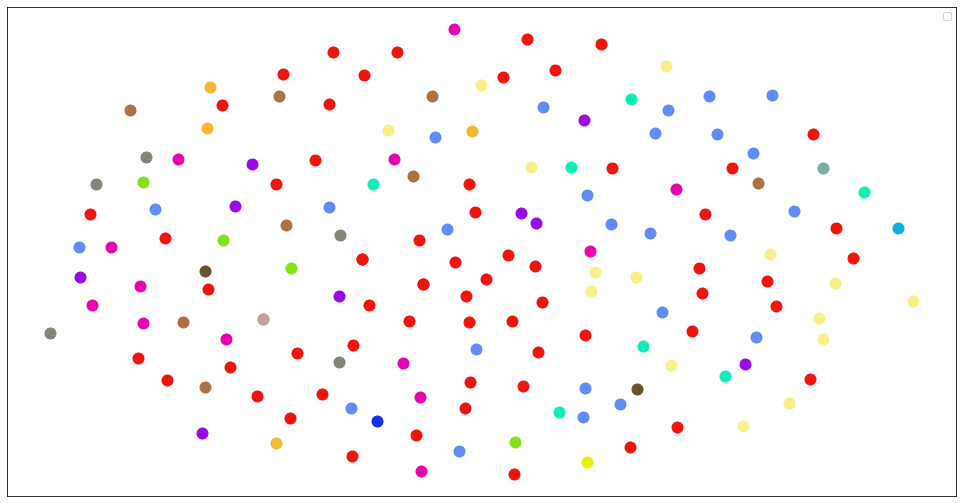

In [91]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=cluster.labels_))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
        #    label=cluster_names[name], 
            color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point
    
    
plt.show() #show the plot
